## Ammonia concentration (ppm) prediction model development using Dataset-B3

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel('ammonia.xlsx')
df.head()

,Unnamed: 0,DOC,Salinity (ppt),SDR (cm),Water colour,Water level (cm),TSS (ml/L),Average PH,Average DO (ppm),Running aerator (HP),TDF (kg),ABW (gm),Water temperature (˚C),PH change,Ammonia (ppm),Water exchange (cm)
0,0,1,16,50,4,120,1.0,8.25,5.783333,56,1.7,0.008000,29.10,0.3,0.026,0
1,1,2,16,48,5,120,2.0,8.25,5.600000,31,2.4,0.022571,28.65,0.1,0.028,0
2,2,3,16,55,4,132,0.5,8.05,5.333333,29,3.4,0.037143,28.10,0.1,0.023,5
3,3,4,16,60,4,128,0.5,8.00,5.466667,44,4.2,0.051714,28.40,0.0,0.018,0
4,4,5,16,45,4,126,0.5,8.00,5.433333,57,5.0,0.066286,28.15,0.2,0.030,0


In [3]:
data=pd.DataFrame(df.dtypes)
data=data.rename(columns={0:'DataType'})
data

,DataType
Unnamed: 0,int64
DOC,int64
Salinity (ppt),int64
SDR (cm),int64
Water colour,int64
Water level (cm),int64
TSS (ml/L),float64
Average PH,float64
Average DO (ppm),float64
Running aerator (HP),int64


In [4]:
df.isnull().sum()

Unnamed: 0                0
DOC                       0
Salinity (ppt)            0
SDR (cm)                  0
Water colour              0
Water level (cm)          0
TSS (ml/L)                0
Average PH                0
Average DO (ppm)          0
Running aerator (HP)      0
TDF (kg)                  0
ABW (gm)                  0
Water temperature (˚C)    0
PH change                 0
Ammonia (ppm)             0
Water exchange (cm)       0
dtype: int64

In [5]:
x=df[['DOC', 'Salinity (ppt)',  'ABW (gm)', 'Running aerator (HP)', 'TDF (kg)']]
x

,DOC,Salinity (ppt),ABW (gm),Running aerator (HP),TDF (kg)
0,1,16,0.008000,56,1.7
1,2,16,0.022571,31,2.4
2,3,16,0.037143,29,3.4
3,4,16,0.051714,44,4.2
4,5,16,0.066286,57,5.0
...,...,...,...,...,...
395,96,22,19.100000,934,460.0
396,97,23,19.200000,1128,400.0
397,98,23,19.300000,922,410.0
398,99,23,19.400000,960,400.0


In [6]:
y=df['Ammonia (ppm)']
y

0      0.026
1      0.028
2      0.023
3      0.018
4      0.030
       ...  
395    0.054
396    0.049
397    0.044
398    0.039
399    0.054
Name: Ammonia (ppm), Length: 400, dtype: float64

In [7]:
from sklearn.preprocessing import StandardScaler
rs=StandardScaler()
x=rs.fit_transform(x)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
linreg=LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [11]:
y_pred=linreg.predict(x_test) 

In [12]:
linreg.score(x_test, y_test)

0.19447216591394856

In [13]:
linreg.score(x_train,y_train)

0.19689151805909733

In [14]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(r2_score(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))

0.05249066132066245
0.006538332251802096
0.08085995456220647
0.19447216591394856
0.8500645263250389


In [15]:
from sklearn.tree import DecisionTreeRegressor

In [16]:
treereg=DecisionTreeRegressor(splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=2, random_state=3)
treereg.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_leaf=2, random_state=3)

In [17]:
ytree_pred=treereg.predict(x_test)

In [18]:
treereg.score(x_train, y_train)

0.9307475745364076

In [19]:
treereg.score(x_test,y_test)

0.6484110771123692

In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, ytree_pred))
print(mean_squared_error(y_test, ytree_pred))
print(np.sqrt(mean_squared_error(y_test, ytree_pred)))
print(r2_score(y_test, ytree_pred))
print(mean_absolute_percentage_error(y_test, ytree_pred))

0.032464236111111114
0.002853787413194445
0.053420851857626205
0.6484110771123692
0.44781730756603116


In [21]:
from sklearn.ensemble import AdaBoostRegressor

In [22]:
adareg=AdaBoostRegressor(random_state=3, n_estimators=180)
adareg.fit(x_train, y_train)

AdaBoostRegressor(n_estimators=180, random_state=3)

In [23]:
yada_pred=adareg.predict(x_test)

In [24]:
adareg.score(x_train, y_train)

0.6241456597237014

In [25]:
adareg.score(x_test, y_test)

0.46030489766781124

In [26]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, yada_pred))
print(mean_squared_error(y_test, yada_pred))
print(np.sqrt(mean_squared_error(y_test, yada_pred)))
print(r2_score(y_test, yada_pred))
print(mean_absolute_percentage_error(y_test, yada_pred))

0.04289768660172438
0.004380613238177967
0.06618620126716722
0.46030489766781124
0.720260001499228


In [27]:
from sklearn.ensemble import GradientBoostingRegressor

In [28]:
gbrreg=GradientBoostingRegressor(n_estimators=180, learning_rate=0.5, max_depth=10, random_state=3, loss='ls',min_samples_leaf=5)
gbrreg.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, max_depth=10, min_samples_leaf=5,
                          n_estimators=180, random_state=3)

In [29]:
ygbr_pred=gbrreg.predict(x_test)

In [30]:
gbrreg.score(x_train, y_train)

0.999997569182578

In [31]:
gbrreg.score(x_test, y_test)

0.6569013040020479

In [32]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, ygbr_pred))
print(mean_squared_error(y_test, ygbr_pred))
print(np.sqrt(mean_squared_error(y_test, ygbr_pred)))
print(r2_score(y_test, ygbr_pred))
print(mean_absolute_percentage_error(y_test, ygbr_pred))

0.0336849040957532
0.0027848736873752897
0.05277190244225889
0.6569013040020479
0.565276164429712


In [33]:
from sklearn.ensemble import RandomForestRegressor


In [34]:
rf=RandomForestRegressor(n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=25, random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000,
                      random_state=42)

In [35]:
yrf_pred=rf.predict(x_test)

In [36]:
rf.score(x_train, y_train)

0.9348460989903454

In [37]:
rf.score(x_test, y_test)

0.6683444206772386

In [38]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, yrf_pred))
print(mean_squared_error(y_test, yrf_pred))
print(np.sqrt(mean_squared_error(y_test, yrf_pred)))
print(r2_score(y_test, yrf_pred))
print(mean_absolute_percentage_error(y_test, yrf_pred))

0.030528112500000038
0.0026919918580299096
0.051884408621761406
0.6683444206772386
0.47529850440089094


In [39]:
sns.set_style({'font.family':'serif','font.serif':'Times New Roman'})
plt.rcParams.update({'font.size':12})

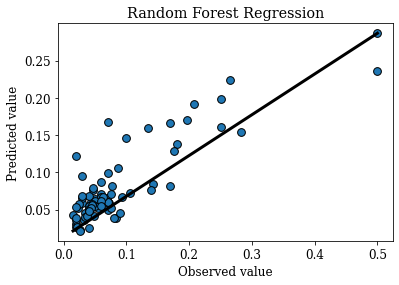

<Figure size 720x576 with 0 Axes>

In [40]:
fig, ax = plt.subplots()
plt.figure(figsize=(10,8))
ax.scatter(y_test, yrf_pred, edgecolors=(0,0,0),s=60)
ax.plot([y_test.min(), y_test.max()], [yrf_pred.min(), yrf_pred.max()],"k-",lw=3)
ax.set_xlabel("Observed value")
ax.set_ylabel("Predicted value")
ax.set_title('Random Forest Regression')
plt.show()

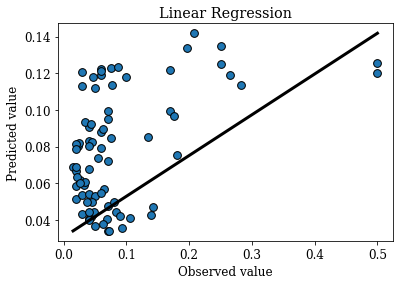

<Figure size 720x576 with 0 Axes>

In [41]:
fig, ax = plt.subplots()
plt.figure(figsize=(10,8))
ax.scatter(y_test, y_pred, edgecolors=(0,0,0),s=60)
ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()],"k-",lw=3)
ax.set_xlabel("Observed value")
ax.set_ylabel("Predicted value")
ax.set_title('Linear Regression')
plt.show()